In [2]:
 # Load Basic Libraries
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, save
import plotly.graph_objects as go
import sklearn
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('submission.csv')

In [4]:
train.head(5)

Id County Province_State Country_Region  Population    Weight        Date  \
0   1    NaN            NaN    Afghanistan    27657145  0.058359  2020-01-23   
1   2    NaN            NaN    Afghanistan    27657145  0.583587  2020-01-23   
2   3    NaN            NaN    Afghanistan    27657145  0.058359  2020-01-24   
3   4    NaN            NaN    Afghanistan    27657145  0.583587  2020-01-24   
4   5    NaN            NaN    Afghanistan    27657145  0.058359  2020-01-25   

           Target  TargetValue  
0  ConfirmedCases            0  
1      Fatalities            0  
2  ConfirmedCases            0  
3      Fatalities            0  
4  ConfirmedCases            0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969640 entries, 0 to 969639
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              969640 non-null  int64  
 1   County          880040 non-null  object 
 2   Province_State  917280 non-null  object 
 3   Country_Region  969640 non-null  object 
 4   Population      969640 non-null  int64  
 5   Weight          969640 non-null  float64
 6   Date            969640 non-null  object 
 7   Target          969640 non-null  object 
 8   TargetValue     969640 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 66.6+ MB


In [6]:
train.reset_index(drop=True) # reset index with drop true

Id County Province_State Country_Region  Population    Weight  \
0            1    NaN            NaN    Afghanistan    27657145  0.058359   
1            2    NaN            NaN    Afghanistan    27657145  0.583587   
2            3    NaN            NaN    Afghanistan    27657145  0.058359   
3            4    NaN            NaN    Afghanistan    27657145  0.583587   
4            5    NaN            NaN    Afghanistan    27657145  0.058359   
...        ...    ...            ...            ...         ...       ...   
969635  969636    NaN            NaN       Zimbabwe    14240168  0.607106   
969636  969637    NaN            NaN       Zimbabwe    14240168  0.060711   
969637  969638    NaN            NaN       Zimbabwe    14240168  0.607106   
969638  969639    NaN            NaN       Zimbabwe    14240168  0.060711   
969639  969640    NaN            NaN       Zimbabwe    14240168  0.607106   

              Date          Target  TargetValue  
0       2020-01-23  ConfirmedCases            0  
1       2020-01-23      Fatalities            0  
2       2020-01-24  ConfirmedCases            0  
3       2020-01-24      Fatalities            0  
4       2020-01-25  ConfirmedCases            0  
...            ...             ...          ...  
969635  2020-06-08      Fatalities            0  
969636  2020-06-09  ConfirmedCases           27  
969637  2020-06-09      Fatalities            0  
969638  2020-06-10  ConfirmedCases            6  
969639  2020-06-10      Fatalities            0  

[969640 rows x 9 columns]

In [7]:
# Get the unique countries count
train['Country_Region'].nunique() 

187

Note:
Out of 180 countries data, we have only 8 countries who has given Province wise data for Corona confirmed and fatalities. Hence, alot of this missing data would not be good for our dataset, and hence we will drop this column.



In [8]:
train['Province_State'].nunique() 

133

In [9]:
train['County'].nunique() 

1840

In [10]:
print("fill blanks and add region for counting")
train.drop('Province_State',axis=1,inplace=True)

fill blanks and add region for counting


In [11]:
train['Date']=pd.to_datetime(train['Date'])
train.set_index('Date',inplace=True)

In [12]:
train.head(5)

Id County Country_Region  Population    Weight          Target  \
Date                                                                         
2020-01-23   1    NaN    Afghanistan    27657145  0.058359  ConfirmedCases   
2020-01-23   2    NaN    Afghanistan    27657145  0.583587      Fatalities   
2020-01-24   3    NaN    Afghanistan    27657145  0.058359  ConfirmedCases   
2020-01-24   4    NaN    Afghanistan    27657145  0.583587      Fatalities   
2020-01-25   5    NaN    Afghanistan    27657145  0.058359  ConfirmedCases   

            TargetValue  
Date                     
2020-01-23            0  
2020-01-23            0  
2020-01-24            0  
2020-01-24            0  
2020-01-25            0

In [13]:
def confirmedCases(row):
    if row.Target == 'ConfirmedCases':
        return row.TargetValue
    else:
        return 0
        

In [14]:
train['ConfirmedCases'] = train.apply(confirmedCases,axis=1)

In [15]:
train

Id County Country_Region  Population    Weight  \
Date                                                             
2020-01-23       1    NaN    Afghanistan    27657145  0.058359   
2020-01-23       2    NaN    Afghanistan    27657145  0.583587   
2020-01-24       3    NaN    Afghanistan    27657145  0.058359   
2020-01-24       4    NaN    Afghanistan    27657145  0.583587   
2020-01-25       5    NaN    Afghanistan    27657145  0.058359   
...            ...    ...            ...         ...       ...   
2020-06-08  969636    NaN       Zimbabwe    14240168  0.607106   
2020-06-09  969637    NaN       Zimbabwe    14240168  0.060711   
2020-06-09  969638    NaN       Zimbabwe    14240168  0.607106   
2020-06-10  969639    NaN       Zimbabwe    14240168  0.060711   
2020-06-10  969640    NaN       Zimbabwe    14240168  0.607106   

                    Target  TargetValue  ConfirmedCases  
Date                                                     
2020-01-23  ConfirmedCases            0               0  
2020-01-23      Fatalities            0               0  
2020-01-24  ConfirmedCases            0               0  
2020-01-24      Fatalities            0               0  
2020-01-25  ConfirmedCases            0               0  
...                    ...          ...             ...  
2020-06-08      Fatalities            0               0  
2020-06-09  ConfirmedCases           27              27  
2020-06-09      Fatalities            0               0  
2020-06-10  ConfirmedCases            6               6  
2020-06-10      Fatalities            0               0  

[969640 rows x 8 columns]

In [16]:
def fatalityCases(row):
    if row.Target == 'Fatalities':
        return row.TargetValue
    else:
        return 0

In [17]:
train['Fatalities'] = train.apply(fatalityCases,axis=1)

In [18]:
train.head(100)

Id County Country_Region  Population    Weight          Target  \
Date                                                                          
2020-01-23    1    NaN    Afghanistan    27657145  0.058359  ConfirmedCases   
2020-01-23    2    NaN    Afghanistan    27657145  0.583587      Fatalities   
2020-01-24    3    NaN    Afghanistan    27657145  0.058359  ConfirmedCases   
2020-01-24    4    NaN    Afghanistan    27657145  0.583587      Fatalities   
2020-01-25    5    NaN    Afghanistan    27657145  0.058359  ConfirmedCases   
...         ...    ...            ...         ...       ...             ...   
2020-03-10   96    NaN    Afghanistan    27657145  0.583587      Fatalities   
2020-03-11   97    NaN    Afghanistan    27657145  0.058359  ConfirmedCases   
2020-03-11   98    NaN    Afghanistan    27657145  0.583587      Fatalities   
2020-03-12   99    NaN    Afghanistan    27657145  0.058359  ConfirmedCases   
2020-03-12  100    NaN    Afghanistan    27657145  0.583587      Fatalities   

            TargetValue  ConfirmedCases  Fatalities  
Date                                                 
2020-01-23            0               0           0  
2020-01-23            0               0           0  
2020-01-24            0               0           0  
2020-01-24            0               0           0  
2020-01-25            0               0           0  
...                 ...             ...         ...  
2020-03-10            0               0           0  
2020-03-11            2               2           0  
2020-03-11            0               0           0  
2020-03-12            0               0           0  
2020-03-12            0               0           0  

[100 rows x 9 columns]

In [19]:
train.drop(columns=['Target', 'TargetValue'])

Id County Country_Region  Population    Weight  \
Date                                                             
2020-01-23       1    NaN    Afghanistan    27657145  0.058359   
2020-01-23       2    NaN    Afghanistan    27657145  0.583587   
2020-01-24       3    NaN    Afghanistan    27657145  0.058359   
2020-01-24       4    NaN    Afghanistan    27657145  0.583587   
2020-01-25       5    NaN    Afghanistan    27657145  0.058359   
...            ...    ...            ...         ...       ...   
2020-06-08  969636    NaN       Zimbabwe    14240168  0.607106   
2020-06-09  969637    NaN       Zimbabwe    14240168  0.060711   
2020-06-09  969638    NaN       Zimbabwe    14240168  0.607106   
2020-06-10  969639    NaN       Zimbabwe    14240168  0.060711   
2020-06-10  969640    NaN       Zimbabwe    14240168  0.607106   

            ConfirmedCases  Fatalities  
Date                                    
2020-01-23               0           0  
2020-01-23               0           0  
2020-01-24               0           0  
2020-01-24               0           0  
2020-01-25               0           0  
...                    ...         ...  
2020-06-08               0           0  
2020-06-09              27           0  
2020-06-09               0           0  
2020-06-10               6           0  
2020-06-10               0           0  

[969640 rows x 7 columns]

In [20]:

pivot=pd.pivot_table(train,columns='Country_Region',
                     index='Date',
                     values='ConfirmedCases',
                     aggfunc=np.sum)

pivot_fatality=pd.pivot_table(train,
                              columns='Country_Region',
                              index='Date',
                              values='Fatalities',
                              aggfunc=np.sum)
country_list=[]
value_list=[]
fatality_list=[]

for country in list(pivot.columns):
    country_list.append(country)
    value_list.append(pivot[country].max())
    fatality_list.append(pivot_fatality[country].max())
    new_dict={'Country':country_list,'Confirmed':value_list,'Fatality':fatality_list}

df=pd.DataFrame.from_dict(new_dict)
df.set_index('Country',inplace=True)
df

Confirmed  Fatality
Country                                
Afghanistan               915        30
Albania                    42         4
Algeria                   199        30
Andorra                    79         4
Angola                     17         2
...                       ...       ...
West Bank and Gaza         33         1
Western Sahara              4         1
Yemen                      45        15
Zambia                    208         3
Zimbabwe                   76         1

[187 rows x 2 columns]

In [21]:
sortdf_conf = df.sort_values(by=['Confirmed'],ascending=False)
sortdf_fat = df.sort_values(by=['Fatality'],ascending=False)
top10_conf = sortdf_conf.head(10)
top10_fat = sortdf_fat.head(10)
print(top10_conf)
print(top10_fat)

                Confirmed  Fatality
Country                            
US                 108733     11265
Brazil              33274      1473
China               30272      2580
France              26849      1438
Russia              11656       232
Ecuador             11536       410
India               10864       297
Spain                9630       961
Peru                 8875       260
United Kingdom       8733      1172
                Confirmed  Fatality
Country                            
US                 108733     11265
China               30272      2580
Brazil              33274      1473
France              26849      1438
United Kingdom       8733      1172
Mexico               4883      1092
Spain                9630       961
Italy                6557       919
Chile                6405       627
Germany              6933       510


In [22]:

# Confirmed COVID-19 Cases by country
import plotly.express as px
fig = px.bar(top10_conf, x=top10_conf.index, y='Confirmed', 
             labels={'x':'Country'}, color="Confirmed", 
             color_continuous_scale=px.colors.sequential.Rainbow_r)
fig.update_layout(title_text='Top 10 Confirmed COVID-19 cases by country')
fig.show()

fig = px.bar(top10_fat, x=top10_fat.index, y='Fatality', 
             labels={'x':'Country'}, color="Fatality", 
             color_continuous_scale=px.colors.sequential.Rainbow_r)
fig.update_layout(title_text='Top 10 Fatality COVID-19 cases by country')
fig.show()

In [23]:
# We can also sort values using this code
top_confirmed=df.sort_values(by='Confirmed',ascending=False)[:10]
top_confirmed

Confirmed  Fatality
Country                            
US                 108733     11265
Brazil              33274      1473
China               30272      2580
France              26849      1438
Russia              11656       232
Ecuador             11536       410
India               10864       297
Spain                9630       961
Peru                 8875       260
United Kingdom       8733      1172

In [24]:
# Make List of Top 10 Countries and India and Pakistan- The Countries of interest.
list_countries=list(top_confirmed.index)

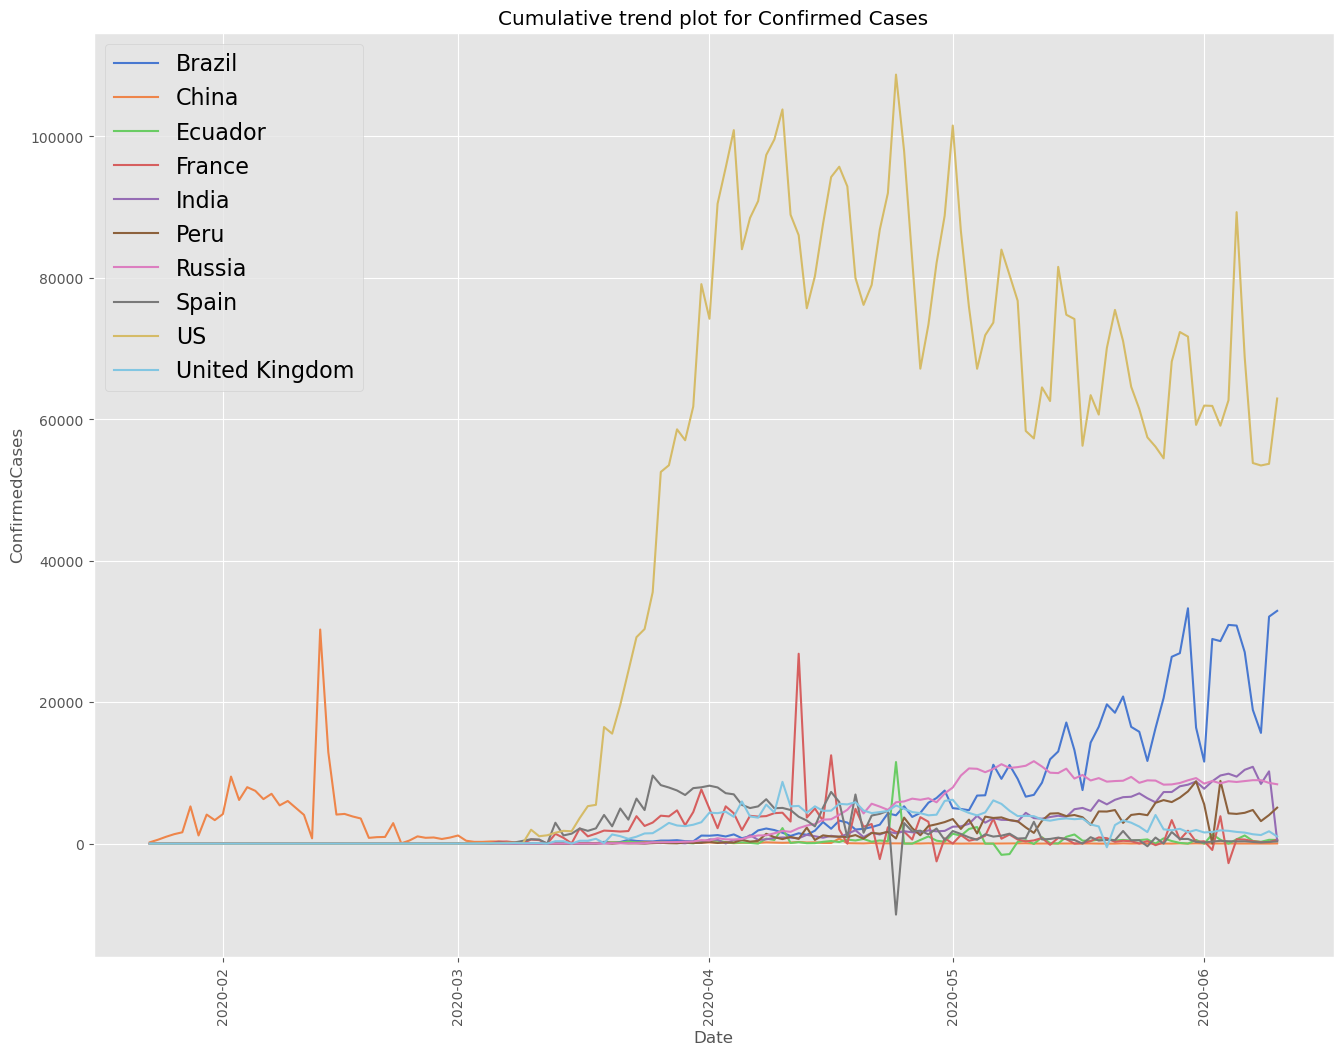

In [25]:
times_series_cntr = train.groupby(['Date','Country_Region'])['ConfirmedCases'].sum()\
                    .reset_index().set_index('Date')
df_countries_tm = times_series_cntr[times_series_cntr['Country_Region'].isin(list_countries)]


plt.figure(figsize=(16,12))
ax = sns.lineplot(x=df_countries_tm.index, 
                  y="ConfirmedCases", 
                  hue="Country_Region", 
                  data=df_countries_tm,palette='muted').set_title('Cumulative line')

plt.legend(loc=2, prop={'size': 16})
plt.title('Cumulative trend plot for Confirmed Cases')
plt.xticks(rotation=90);

In [26]:
Confirm_pivot=pd.pivot_table(train,index='Date',columns='Country_Region',
                             values='ConfirmedCases',aggfunc=np.sum)
Confirm_pivot

Country_Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
Date                                                             
2020-01-23                0        0        0        0       0   
2020-01-24                0        0        0        0       0   
2020-01-25                0        0        0        0       0   
2020-01-26                0        0        0        0       0   
2020-01-27                0        0        0        0       0   
...                     ...      ...      ...      ...     ...   
2020-06-06              582       20      115        0       2   
2020-06-07              791       14      104        0       3   
2020-06-08              575       17      111        0       1   
2020-06-09              542       36      117        0       4   
2020-06-10              683       42      102        0      17   

Country_Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
Date                                                                          
2020-01-23                        0          0        0          0        0   
2020-01-24                        0          0        0          0        0   
2020-01-25                        0          0        0          0        0   
2020-01-26                        0          0        0          8        0   
2020-01-27                        0          0        0          2        0   
...                             ...        ...      ...        ...      ...   
2020-06-06                        0        983      547         14       55   
2020-06-07                        0        774      766         12        4   
2020-06-08                        0        826      195          4       66   
2020-06-09                        0       1141      350         14       11   
2020-06-10                        0       1226      428         22       26   

Country_Region  ...  United Kingdom  Uruguay  Uzbekistan  Venezuela  Vietnam  \
Date            ...                                                            
2020-01-23      ...               0        0           0          0        2   
2020-01-24      ...               0        0           0          0        0   
2020-01-25      ...               0        0           0          0        0   
2020-01-26      ...               0        0           0          0        0   
2020-01-27      ...               0        0           0          0        0   
...             ...             ...      ...         ...        ...      ...   
2020-06-06      ...            1560       11          87        171        1   
2020-06-07      ...            1327        0         237         61        2   
2020-06-08      ...            1213        0         109         96        1   
2020-06-09      ...            1747        1          80        159        0   
2020-06-10      ...            1007        1         103        106        0   

Country_Region  West Bank and Gaza  Western Sahara  Yemen  Zambia  Zimbabwe  
Date                                                                         
2020-01-23                       0               0      0       0         0  
2020-01-24                       0               0      0       0         0  
2020-01-25                       0               0      0       0         0  
2020-01-26                       0               0      0       0         0  
2020-01-27                       0               0      0       0         0  
...                            ...             ...    ...     ...       ...  
2020-06-06                       0               0     13       0        14  
2020-06-07                       8               0      2       0         3  
2020-06-08                       1               0     12     111         5  
2020-06-09                       8               0     28       0        27  
2020-06-10                       4               0     36       0         6  

[140 rows x 187 columns]

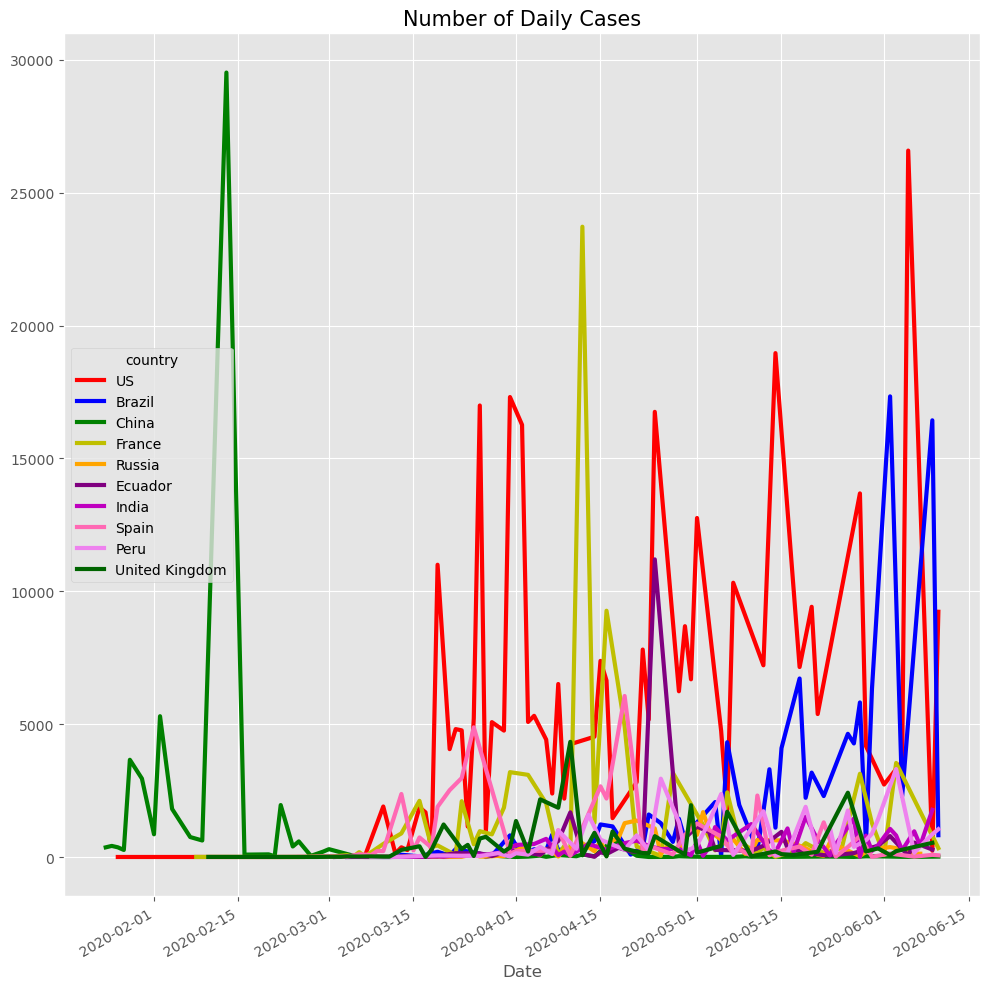

In [57]:
plt.figure(figsize=(10,10))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    Confirm=Confirm_pivot[Confirm_pivot[country]>0][country].diff().fillna(0)
    Confirm=Confirm[Confirm>0]
    Confirm.plot(color=colors[i],label=country,markersize=8,lw=3)   
    plt.title('Number of Daily Cases',fontsize=15)
    plt.legend(title='country')
plt.tight_layout()

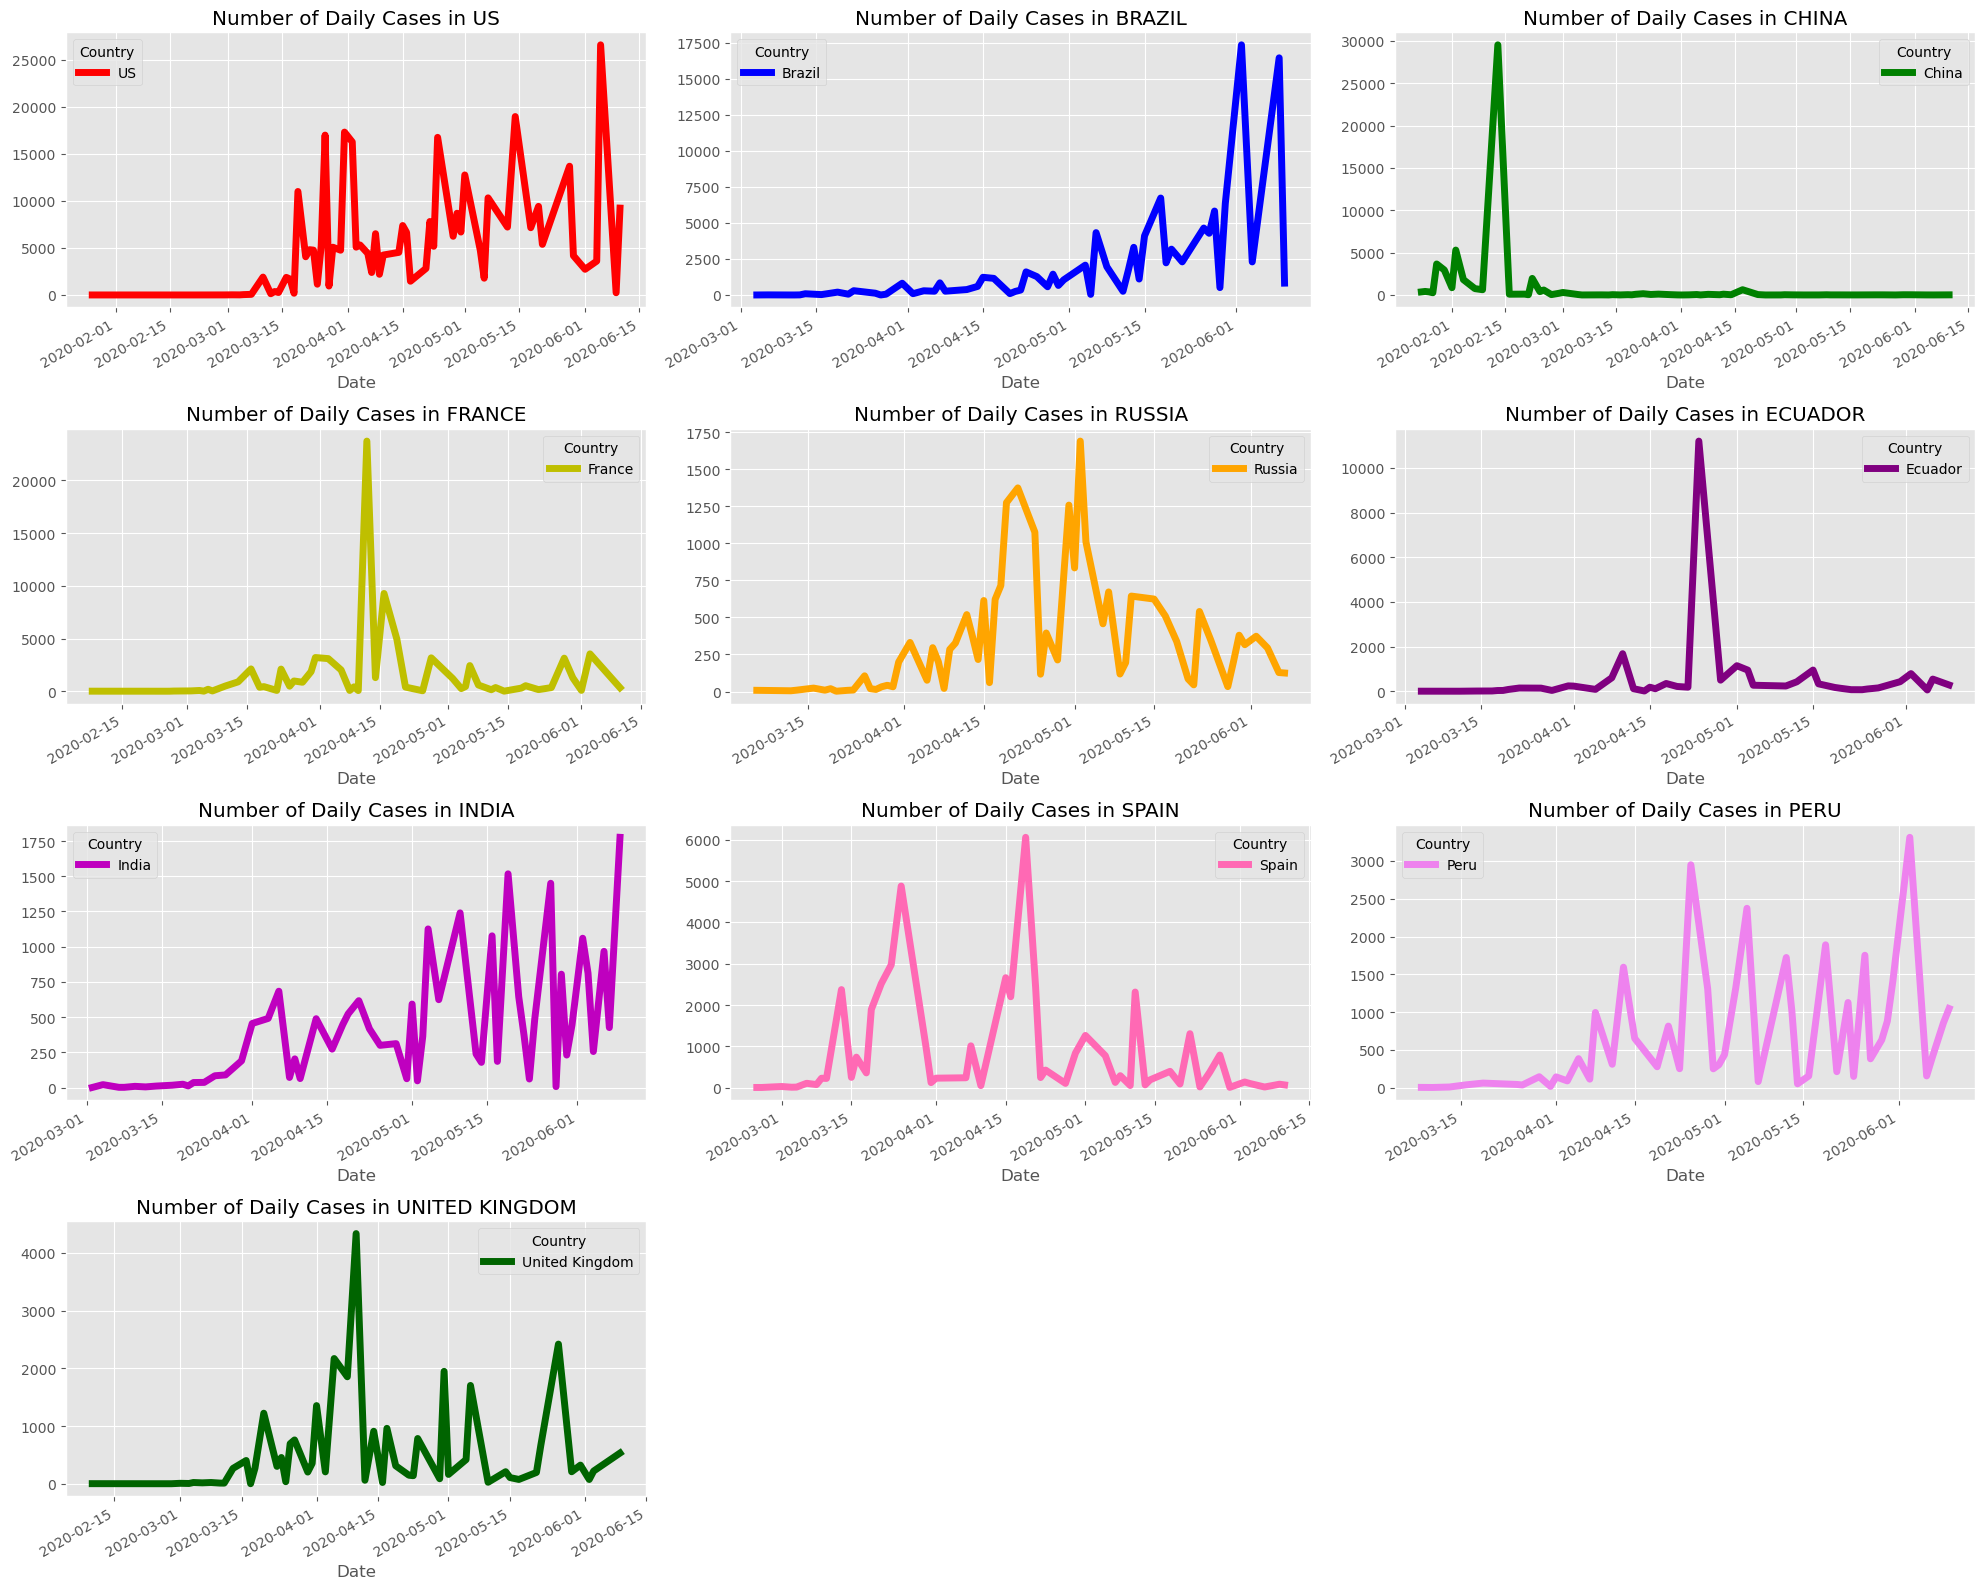

In [28]:
plt.figure(figsize=(20,16))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    Confirm=Confirm_pivot[Confirm_pivot[country]>0][country].diff().fillna(0)
    Confirm=Confirm[Confirm>0]
    
    plt.subplot(4,3,i+1)
    Confirm.plot(color=colors[i],label=country,markersize=12,lw=5)    
    plt.xticks()
    plt.legend(title='Country')
    plt.title('Number of Daily Cases in {}'.format(country.upper()))
plt.tight_layout()

In [29]:

coun = []
maxi= []
id_m= []

for country in list_countries:
    id_max=Confirm_pivot[country].diff().fillna(0).idxmax()
    maxim=Confirm_pivot[country].diff().fillna(0).max()
    print('Maximum New Cases registered for {0} was {1} on {2}'.format(country,maxim,id_max))
    coun.append(country)
    maxi.append(maxim)
    id_m.append(id_max)

df_max_case = pd.DataFrame(list(zip(coun, maxi, id_m)), columns =['country', 'max_case', 'date']) 
df_max_case

df_max_case['date']=df_max_case['date'].astype(str)

Maximum New Cases registered for US was 26589.0 on 2020-06-05 00:00:00
Maximum New Cases registered for Brazil was 17338.0 on 2020-06-02 00:00:00
Maximum New Cases registered for China was 29526.0 on 2020-02-13 00:00:00
Maximum New Cases registered for France was 23724.0 on 2020-04-12 00:00:00
Maximum New Cases registered for Russia was 1690.0 on 2020-05-02 00:00:00
Maximum New Cases registered for Ecuador was 11203.0 on 2020-04-24 00:00:00
Maximum New Cases registered for India was 1776.0 on 2020-06-09 00:00:00
Maximum New Cases registered for Spain was 12949.0 on 2020-04-25 00:00:00
Maximum New Cases registered for Peru was 8875.0 on 2020-06-03 00:00:00
Maximum New Cases registered for United Kingdom was 4335.0 on 2020-04-10 00:00:00


In [30]:
fig = px.bar(df_max_case, x=df_max_case.country, y='max_case', text = 'date',
             labels={'x':'country'}, color="country", 
             color_continuous_scale=px.colors.sequential.Rainbow_r)
fig.update_layout(title_text='Date on which a top 12 countries had Maximum cases')
fig.show()

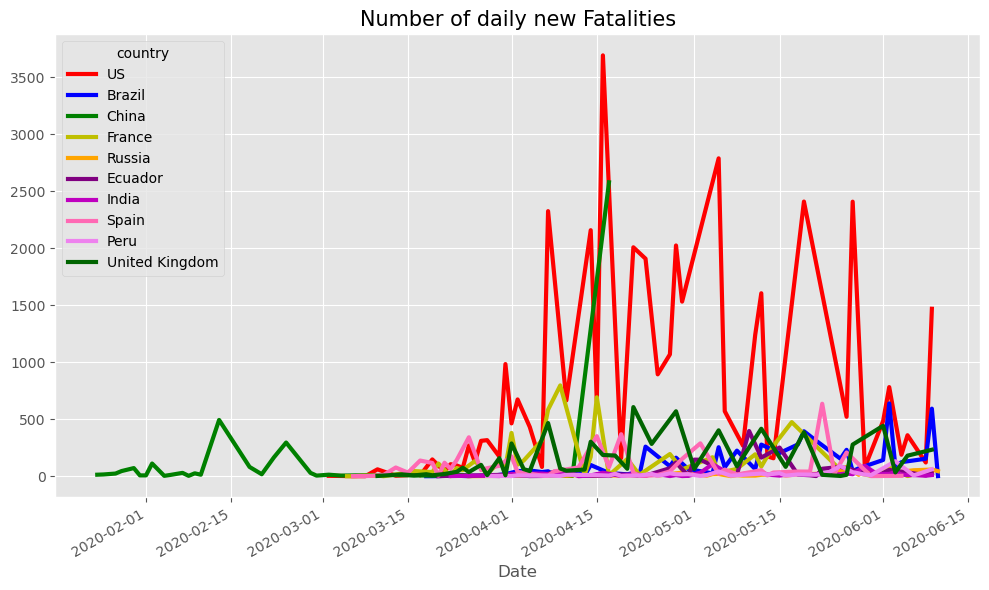

In [31]:
Fatal_pivot=pd.pivot_table(train,index='Date',
                           columns='Country_Region',
                           values='Fatalities',
                           aggfunc=np.sum)

plt.figure(figsize=(10,6))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    Fatal_diff=Fatal_pivot[Fatal_pivot[country]>0][country].diff().fillna(0)
    Fatal_diff=Fatal_diff[Fatal_diff>0]
    Fatal_diff.plot(color=colors[i],label=country,markersize=8,lw=3)   
    plt.title('Number of daily new Fatalities',fontsize=15)
    plt.legend(title='country')
plt.tight_layout()

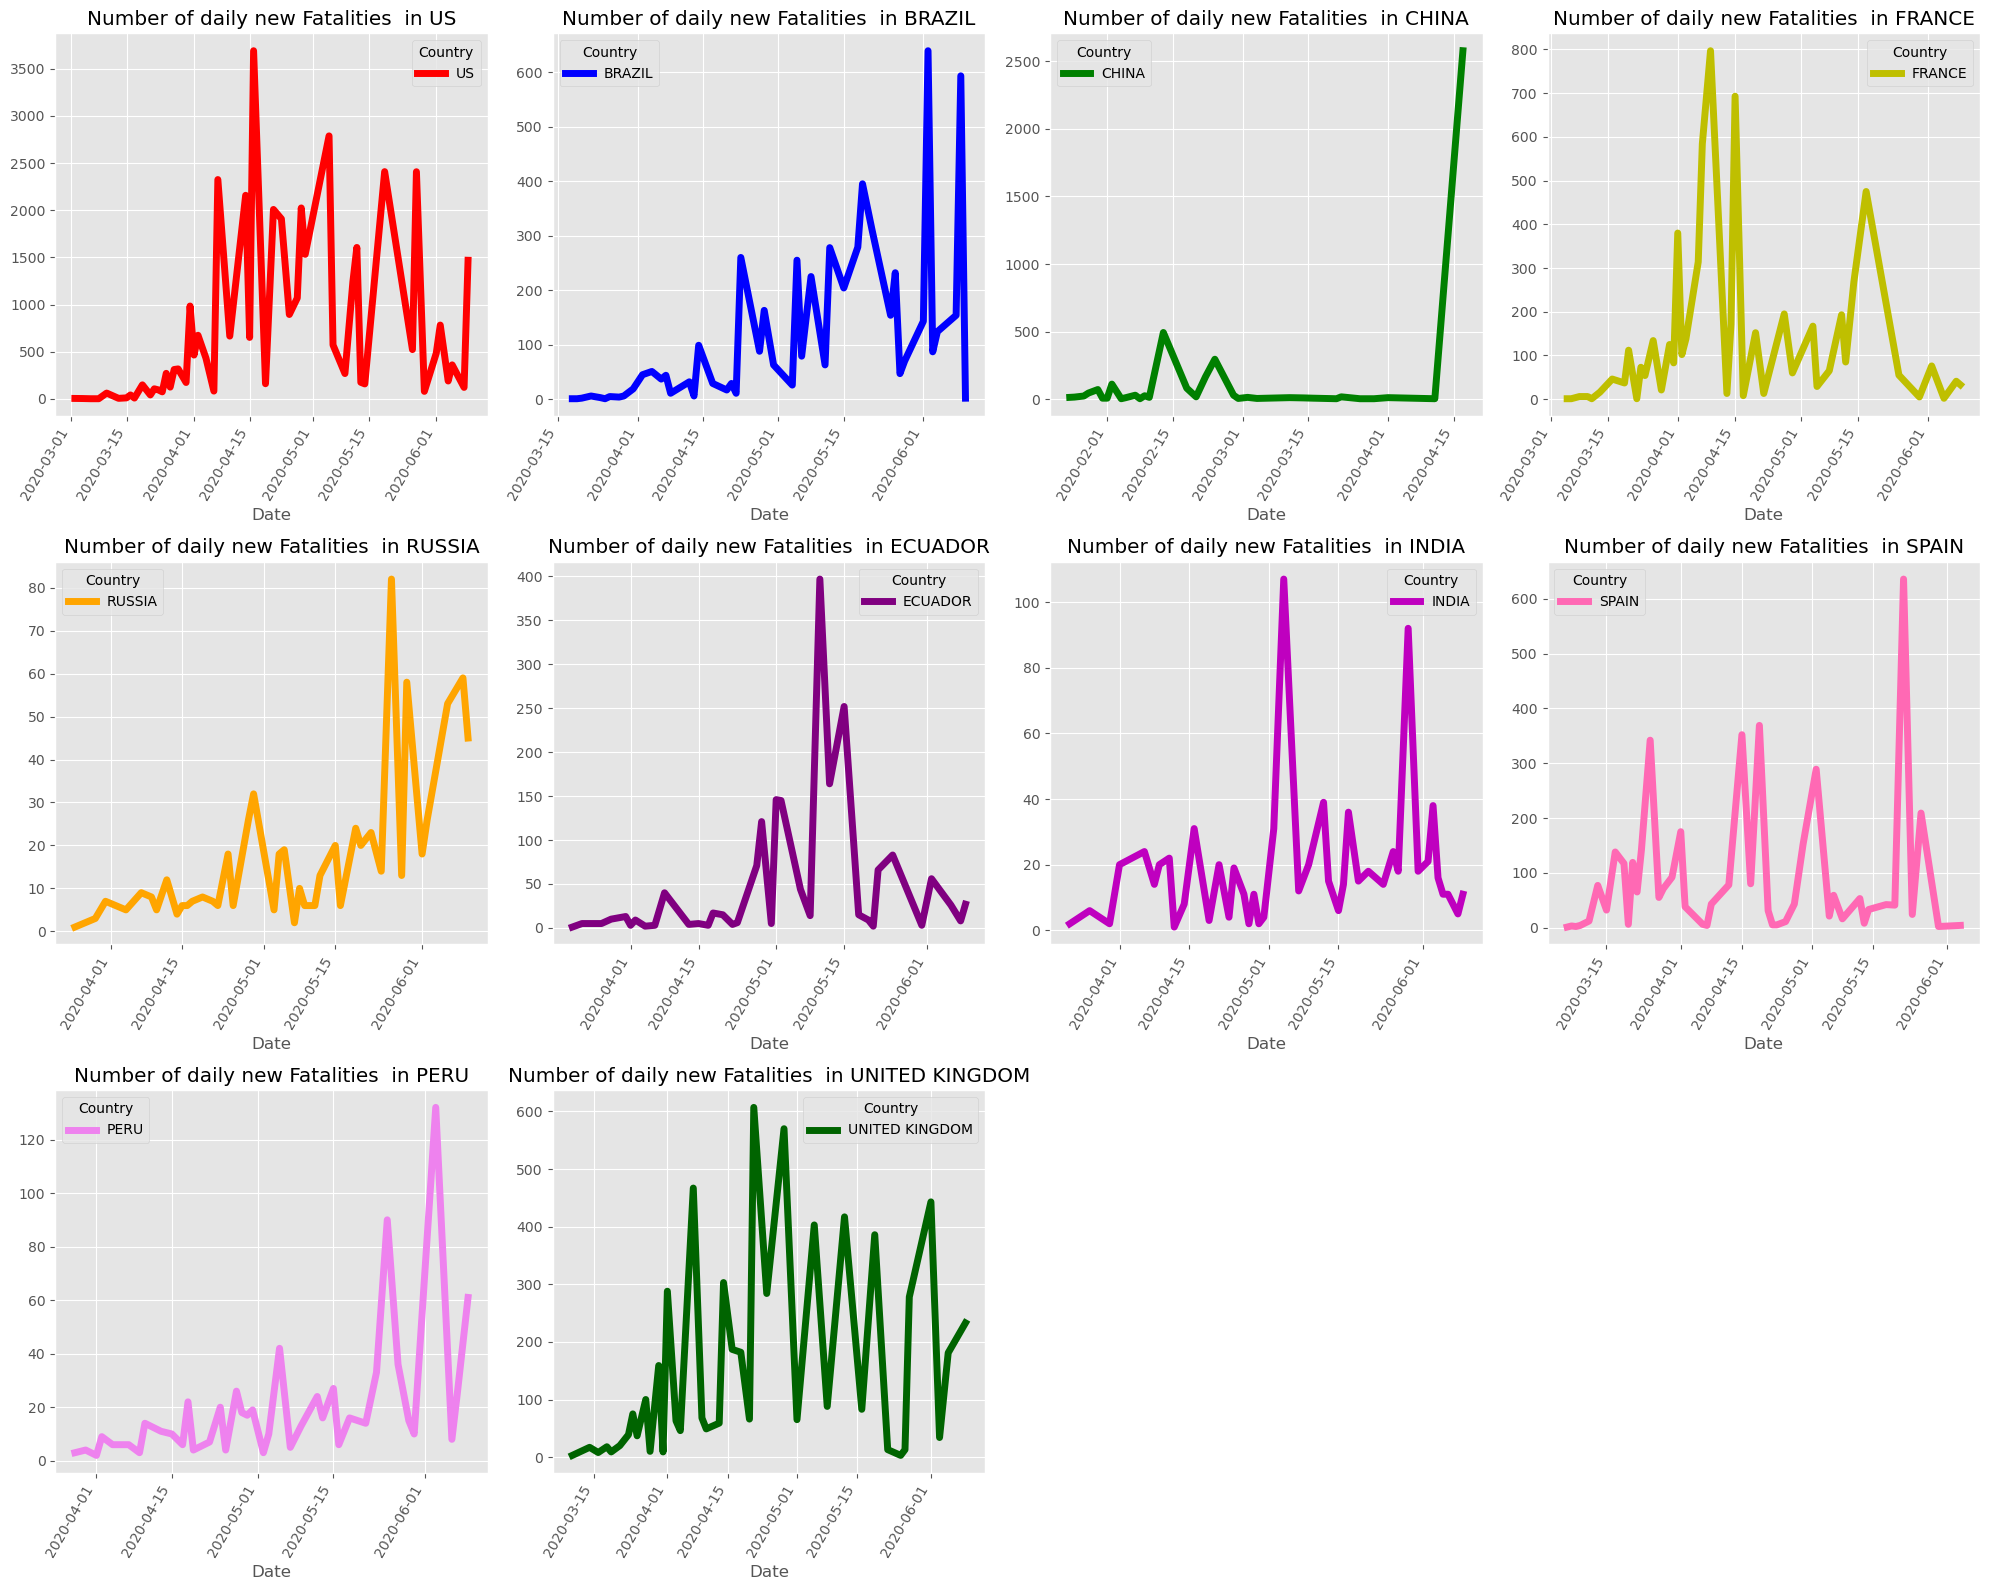

In [32]:
plt.figure(figsize=(20,16))
for i,country in enumerate(list_countries):
    Fatal_diff=Fatal_pivot[(Fatal_pivot[country]>0)][country].diff().fillna(0)
    Fatal_diff=Fatal_diff[Fatal_diff>0]
    plt.subplot(3,4,i+1)
    Fatal_diff.plot(color=colors[i],label=country.upper(),lw=5)
    plt.xticks(rotation=60)
    plt.title('Number of daily new Fatalities  in {}'.format(country.upper()))
    plt.legend(title='Country')
plt.tight_layout()

In [33]:
coun = []
maxi= []
id_m= []

for country in list_countries:
    id_max=Fatal_pivot[country].diff().fillna(0).idxmax()
    maxim=Fatal_pivot[country].diff().fillna(0).max()
    print('Maximum Fatalities for {0} was {1} on {2}'.format(country,maxim,id_max))
    coun.append(country)
    maxi.append(maxim)
    id_m.append(id_max)

df_max_fat = pd.DataFrame(list(zip(coun, maxi, id_m)), columns =['country', 'max_fat', 'date']) 
df_max_fat

df_max_fat['date']=df_max_fat['date'].astype(str)

Maximum Fatalities for US was 3691.0 on 2020-04-16 00:00:00
Maximum Fatalities for Brazil was 639.0 on 2020-06-02 00:00:00
Maximum Fatalities for China was 2580.0 on 2020-04-17 00:00:00
Maximum Fatalities for France was 797.0 on 2020-04-09 00:00:00
Maximum Fatalities for Russia was 82.0 on 2020-05-26 00:00:00
Maximum Fatalities for Ecuador was 397.0 on 2020-05-10 00:00:00
Maximum Fatalities for India was 107.0 on 2020-05-04 00:00:00
Maximum Fatalities for Spain was 2201.0 on 2020-05-26 00:00:00
Maximum Fatalities for Peru was 260.0 on 2020-06-03 00:00:00
Maximum Fatalities for United Kingdom was 607.0 on 2020-04-21 00:00:00


In [34]:
fig = px.bar(df_max_fat, x=df_max_fat.country, y='max_fat', text = 'date',
             labels={'x':'country'}, color="country", 
             color_continuous_scale=px.colors.sequential.Rainbow_r)
fig.update_layout(title_text='Date on which a top 12 countries had Maximum Fatalities')
fig.show()

Text(0.5, 0.98, 'Variation in number of confirmed cases on daily basis')

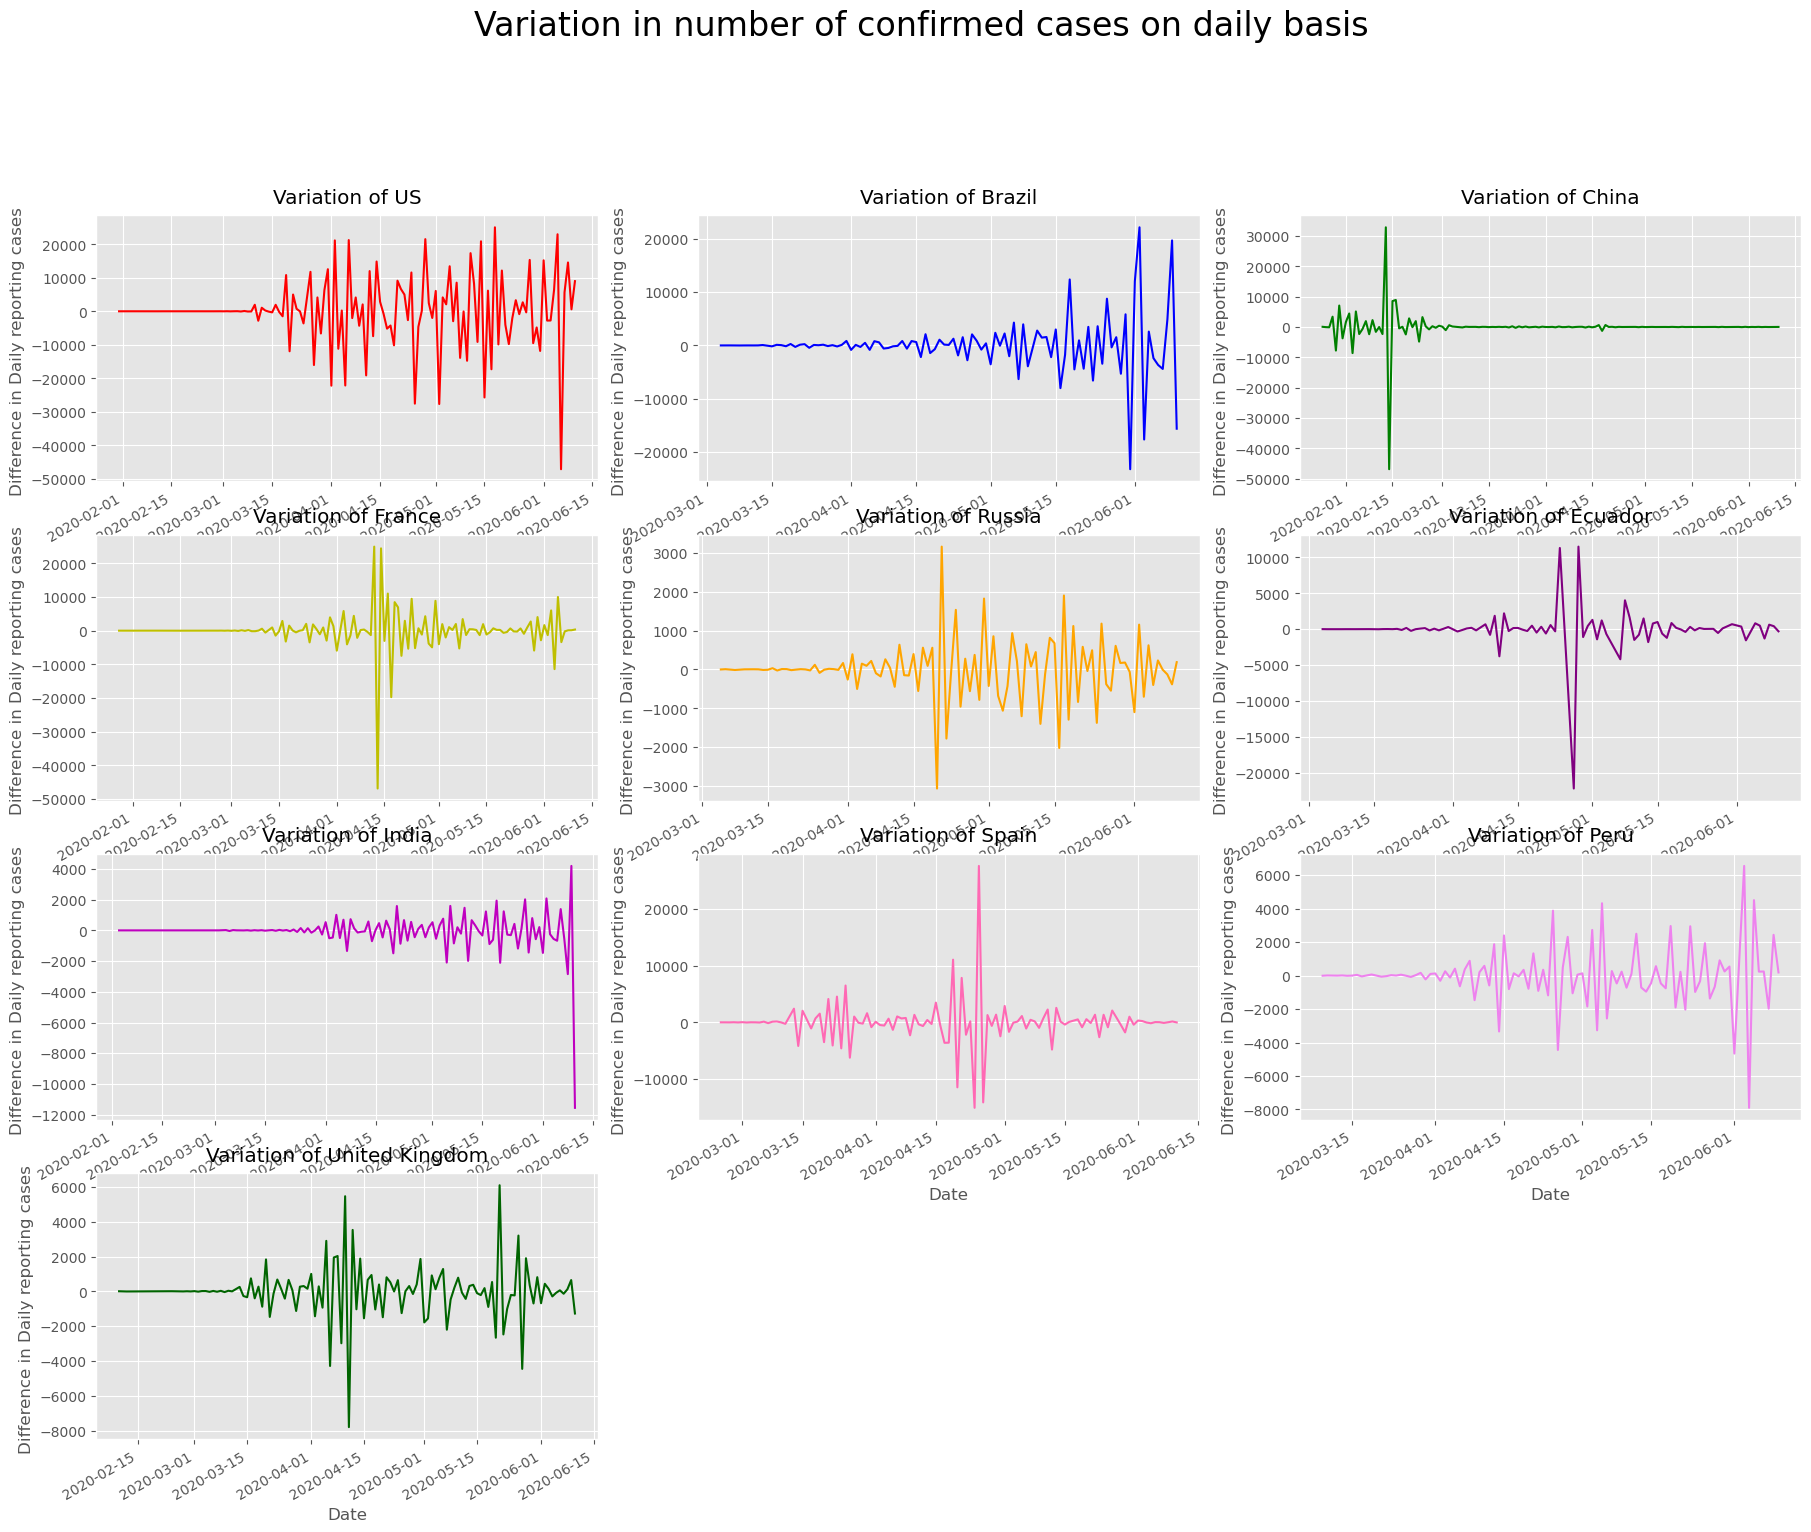

In [35]:

# Understanding New cases confirmation variations on daily basis
plt.figure(figsize=(22,18))
for i,country in enumerate(list_countries):
    plt.subplot(4,3,i+1)
    train[(train['Country_Region']==country)&(train['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum().diff().diff().plot(color=colors[i])
    plt.ylabel('Difference in Daily reporting cases ')
    plt.title('Variation of {}'.format(country),va='bottom')
plt.suptitle('Variation in number of confirmed cases on daily basis',fontsize=24,va='baseline')

Part 3: Exploratory Data Analysis
Q3.1. Confirmed Cases trend (pattern) from first day of incidence (confirmed cases)

Q3.2. Fatalities trend from first day of incidence

Q3.3. Comparision of Confirmed Cases and Fatalities worldwide trend on normal and log scale

Q3.4. Corelation between ConfirmedCases and Fatalities worldwide

Q3.5. Confirmed Cases worldwide trend (without China)

Q3.5. Fatalities Cases worldwide trend (without China)

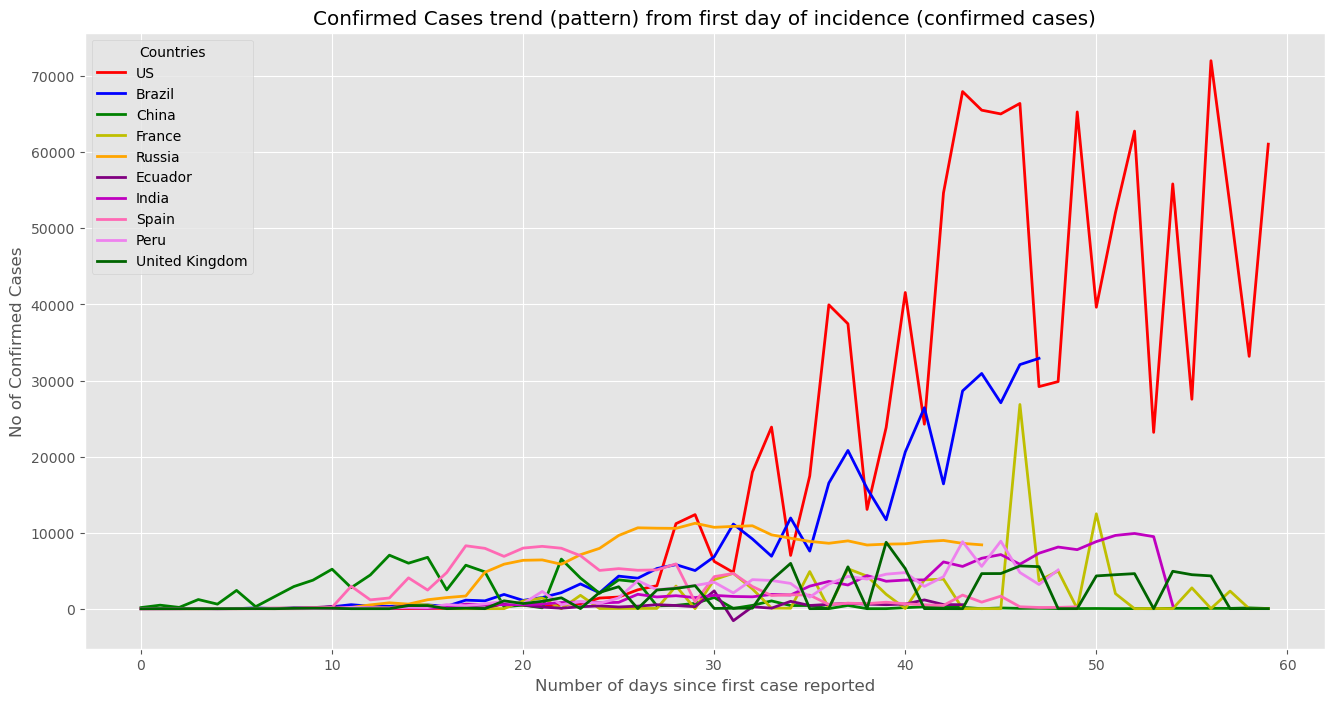

In [36]:
plt.figure(figsize=(16,8))
plt.title('Confirmed Cases trend (pattern) from first day of incidence (confirmed cases)')
for i,country in enumerate(list_countries):
    confirm_group=train[(train['Country_Region']==country)&train['ConfirmedCases']!=0].groupby('Date').agg({'ConfirmedCases':['sum']})
    confirm_value=[j for j in confirm_group.ConfirmedCases['sum'].values]
    plot_value=confirm_value[0:60]
    plt.plot(plot_value,color=colors[i],label=country,lw=2)
    plt.legend(title='Countries')
    plt.xlabel("Number of days since first case reported")
    plt.ylabel("No of Confirmed Cases")

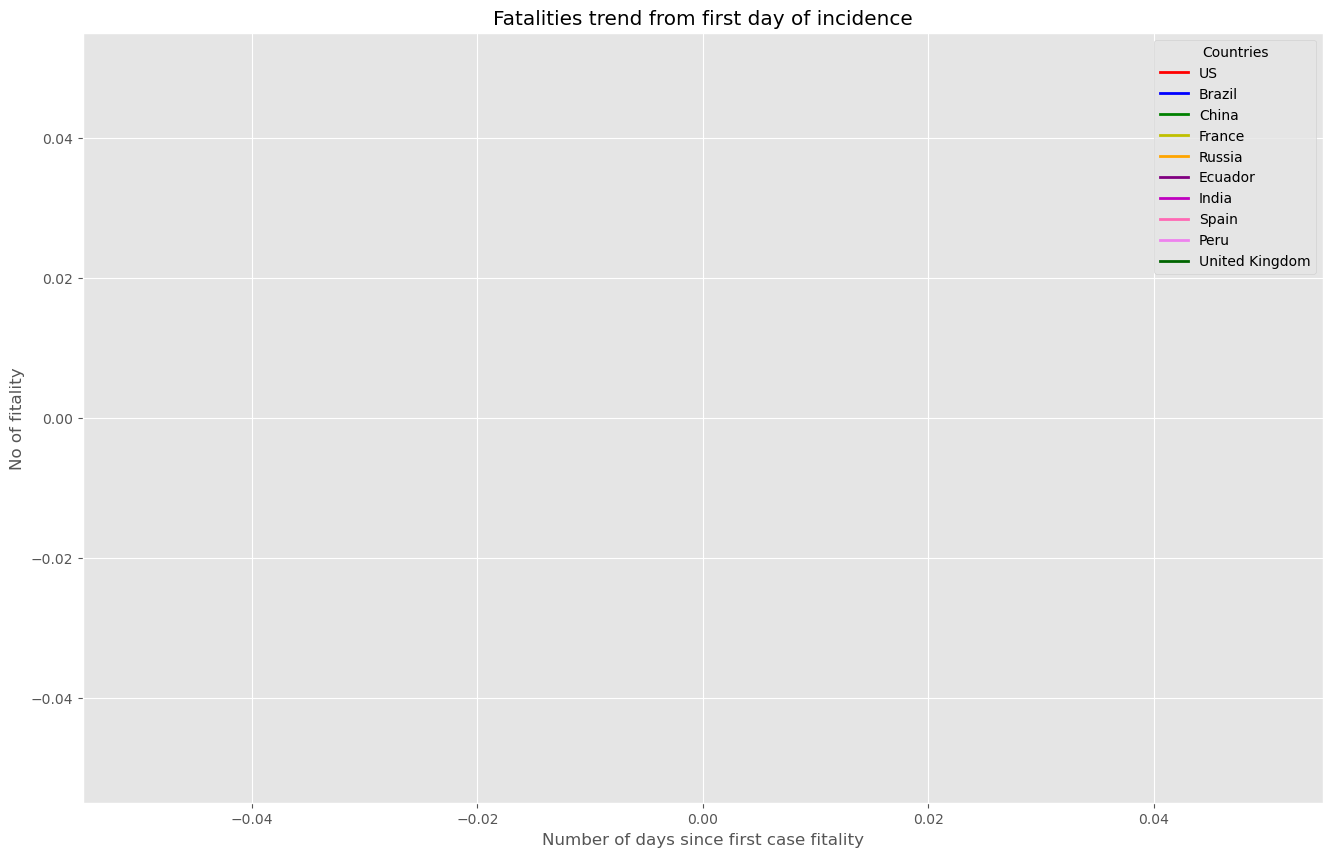

In [59]:
plt.figure(figsize=(16,10))
plt.title('Fatalities trend from first day of incidence')
for i,country in enumerate(list_countries):
    fatal_group=train[(train['Country_Region']==country)&train['Fatalities']!=0].groupby('Date').agg({'Fatalities':['sum']})
    fatal_value=[j for j in fatal_group.Fatalities['sum'].values]
    plot_value=fatal_value[0:60]
    plt.plot(plot_value,color=colors[i],label=country,lw=2)
    plt.legend(title='Countries')
    plt.xlabel("Number of days since first case fitality")
    plt.ylabel("No of fitality")

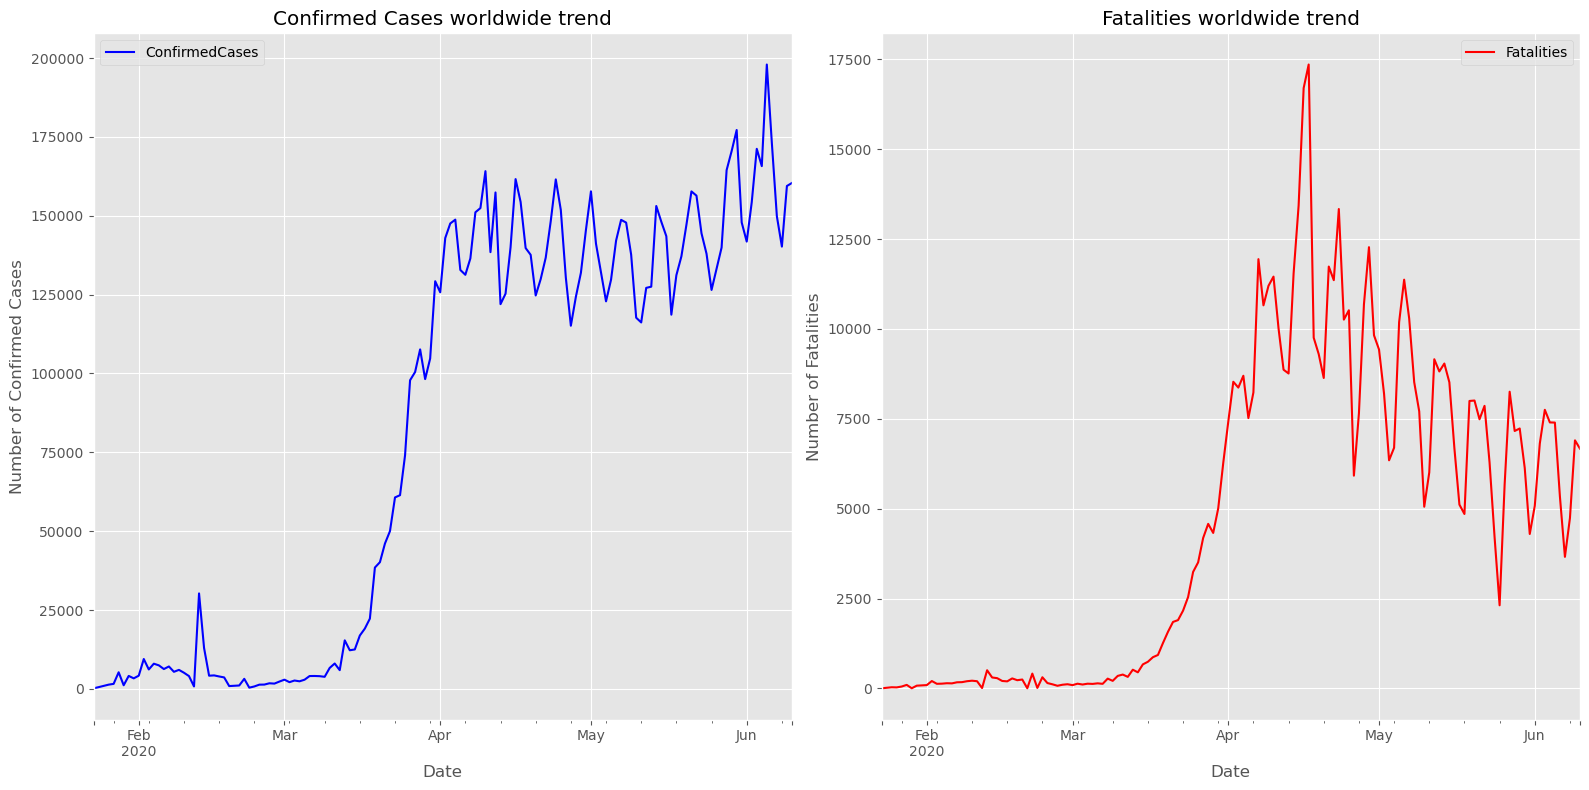

In [38]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
train.groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.title('Confirmed Cases worldwide trend')

plt.subplot(1,2,2)
train.groupby('Date')['Fatalities'].sum().plot(color='r')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend")
plt.legend()
plt.tight_layout()

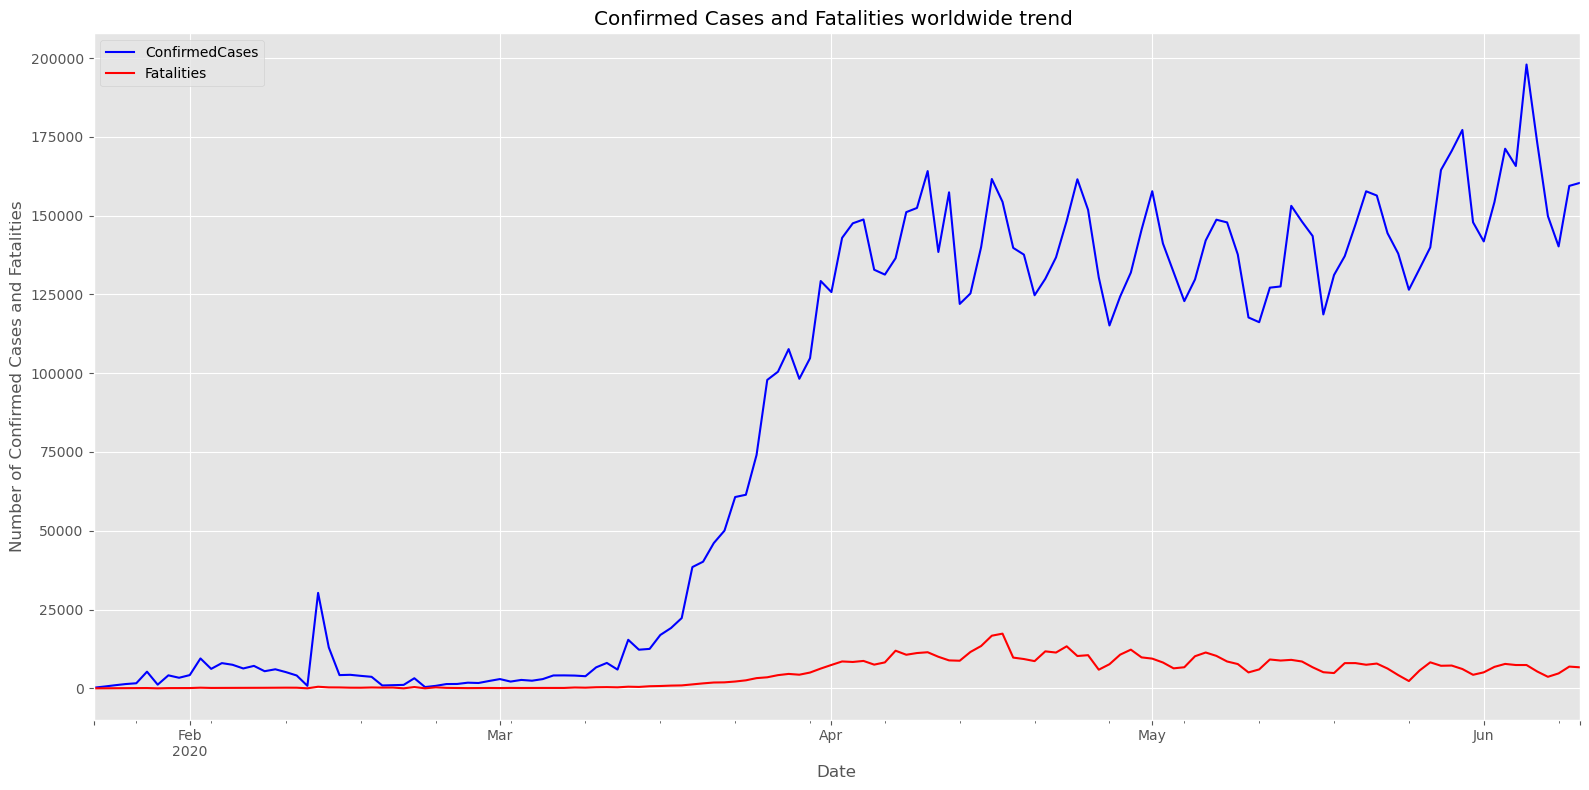

In [39]:
plt.figure(figsize=(16,8))
train.groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
train.groupby('Date')['Fatalities'].sum().plot(color='r')
plt.ylabel('Number of Confirmed Cases and Fatalities')
plt.title('Confirmed Cases and Fatalities worldwide trend ')
plt.legend()
plt.tight_layout()

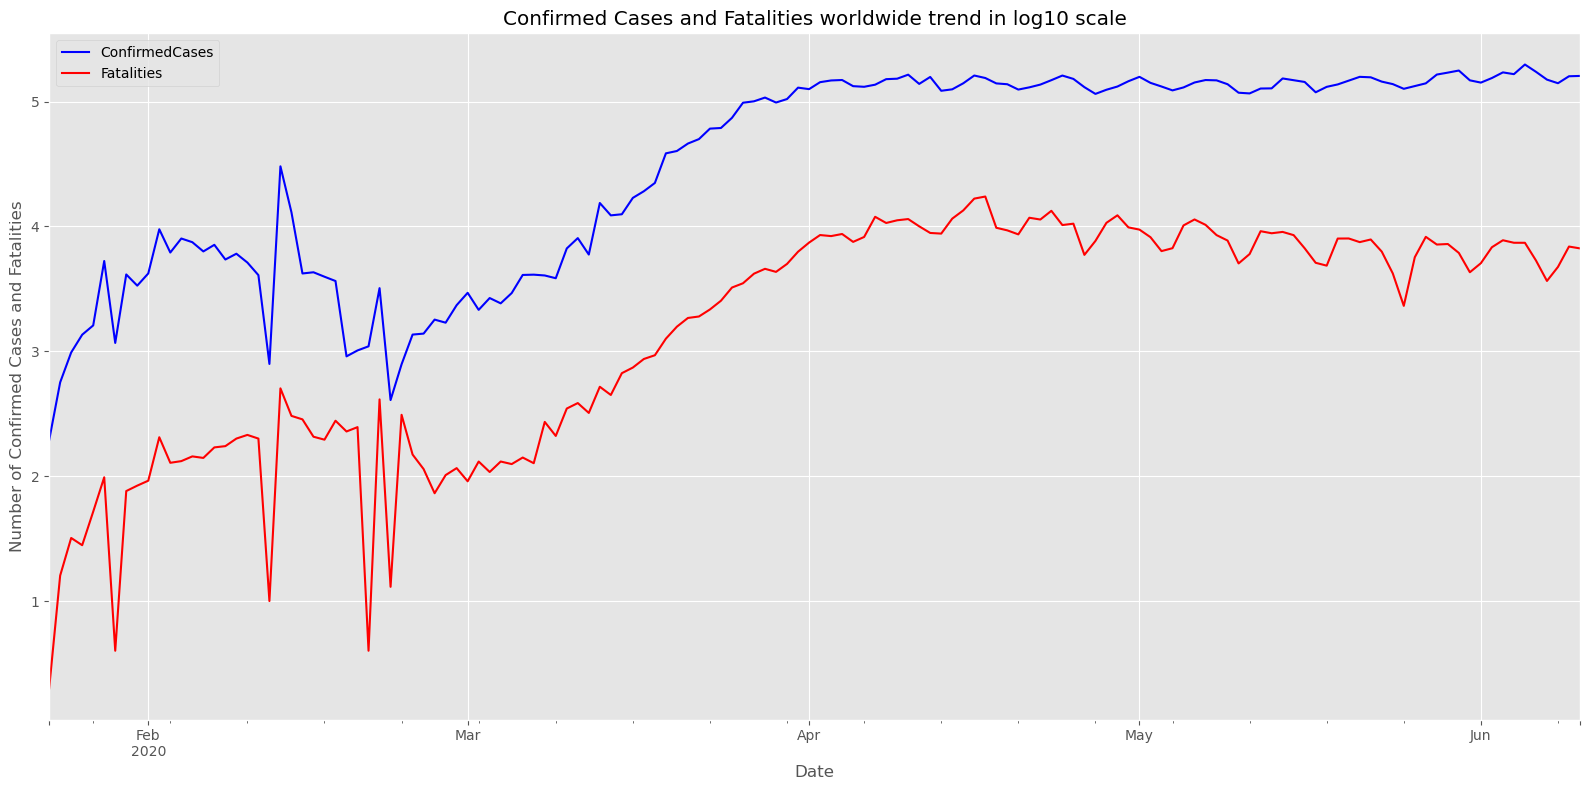

In [40]:
plt.figure(figsize=(16,8))
np.log10(train.groupby('Date')['ConfirmedCases'].sum()).plot(color='blue')
np.log10(train.groupby('Date')['Fatalities'].sum()).plot(color='r')
plt.ylabel('Number of Confirmed Cases and Fatalities')
plt.title('Confirmed Cases and Fatalities worldwide trend in log10 scale')
plt.legend()
plt.tight_layout()

In [41]:
cc=train.groupby('Date')['ConfirmedCases'].sum()
ft=train.groupby('Date')['Fatalities'].sum()

fig = go.Figure(data=go.Scatter(x=cc, y=ft, mode='lines+markers'))
# Edit the layout
fig.update_layout(title='Corelation between ConfirmedCases and Fatalities worldwide',
                   xaxis_title='Confirmed Cases ',
                   yaxis_title='Fatalities')
fig.show()

correlation_matrix = np.corrcoef(cc, ft)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.782414342389443


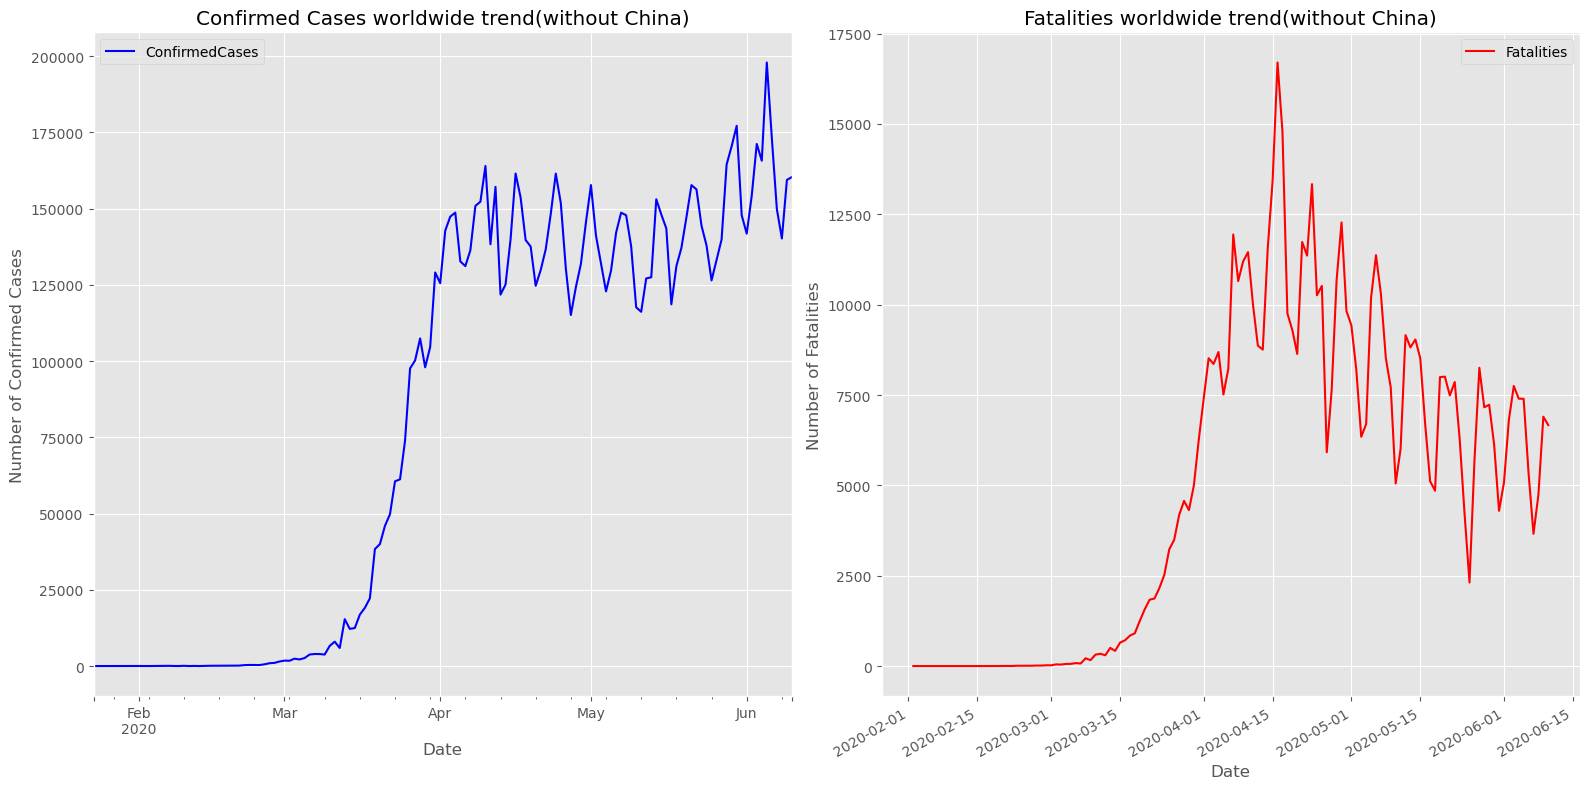

In [42]:
# Confirmed Cases and Fatalities without China's data
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
train[(train['Country_Region']!='China')&(train['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.title('Confirmed Cases worldwide trend(without China)')

plt.subplot(1,2,2)
train[(train['Country_Region']!='China')&(train['Fatalities']!=0)].groupby('Date')['Fatalities'].sum().plot(color='red')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend(without China)")
plt.legend()
plt.tight_layout()

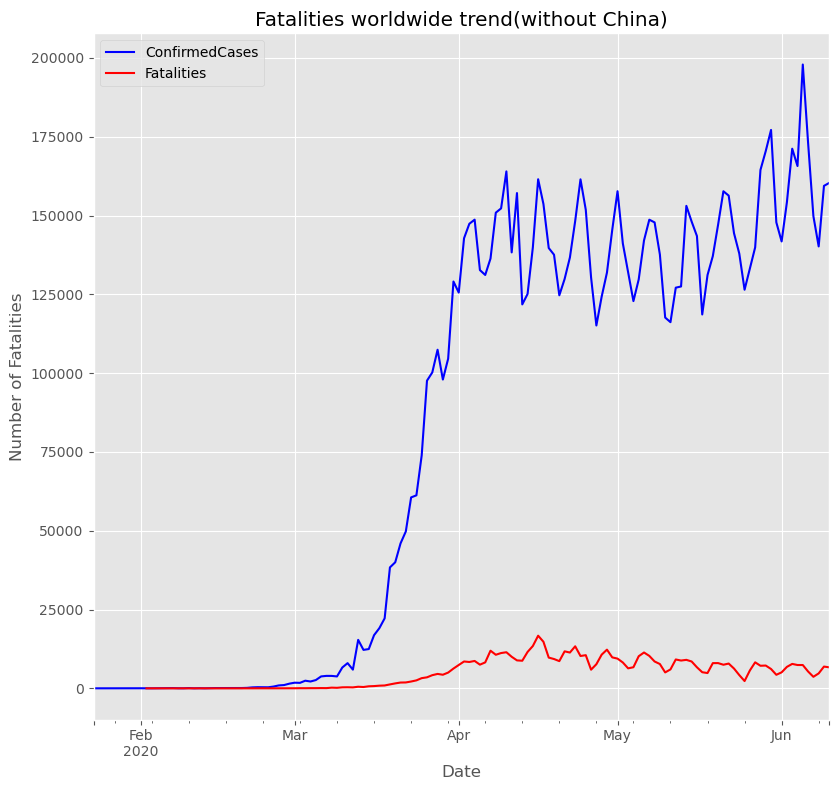

In [43]:
# Confirmed Cases and Fatalities without China's data
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
train[(train['Country_Region']!='China')&(train['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
train[(train['Country_Region']!='China')&(train['Fatalities']!=0)].groupby('Date')['Fatalities'].sum().plot(color='red')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend(without China)")
plt.legend()
plt.tight_layout()

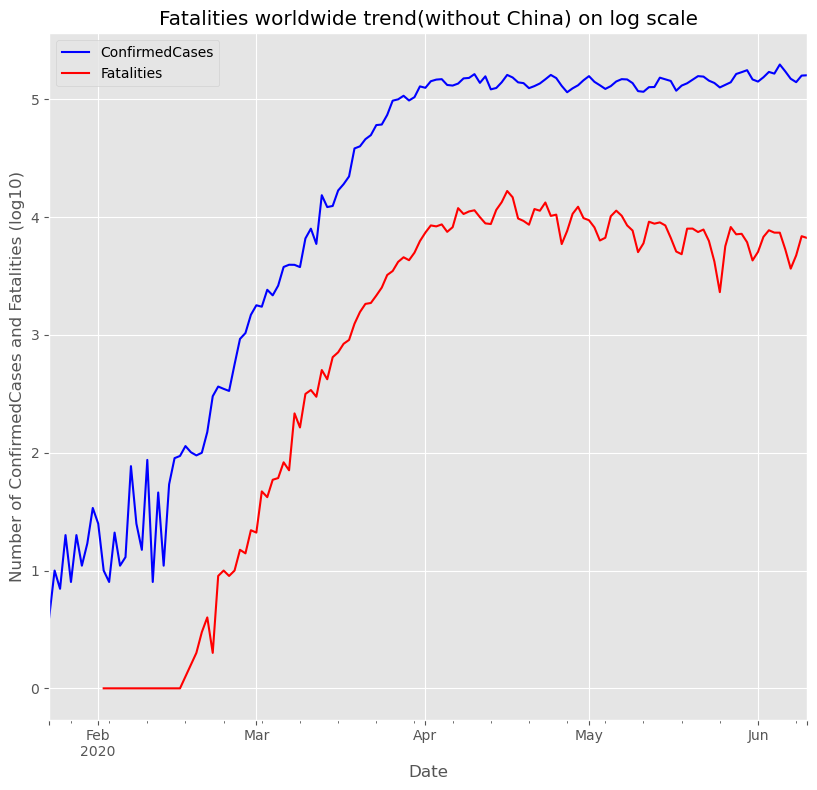

In [44]:
# Confirmed Cases and Fatalities without China's data on Log scale
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
np.log10(train[(train['Country_Region']!='China')&(train['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum()).plot(color='blue')
np.log10(train[(train['Country_Region']!='China')&(train['Fatalities']!=0)].groupby('Date')['Fatalities'].sum()).plot(color='red')
plt.ylabel('Number of ConfirmedCases and Fatalities (log10)')
plt.title("Fatalities worldwide trend(without China) on log scale")
plt.legend()
plt.tight_layout()

Conclusion of Exploratory Data Analysis:

China
According to the news and media Covid-19 has been started from China and the first case was reported in December 2019. The data published on Kaggle has a start date of data collection from 22nd Jan 2020 onwards and by that time in China the confirmed cases were 533.

Italy
Italy has confirmed first case in the end of Jan 2020 (i.e. a month later to China). Italy surpasses China in confirmed cases around 3-4 week of March 2020 and currently third largest in number of registered cases.

These answers are based on the data obtained by 5th April 2020

Q1. Which countries has high number of cases? A1. US followed by Spain and Italy

Q2. How is confirmed cases increases by day? A2.

Q3. What is fatality rate of confirmed cases? Q4. How is cases increasing by day of 1st reported case? Q5. Understanding data of India and UK and comparing it with the world? Q6. What is new rate of increase per case per day?

## Let's do Prediction Now

In [45]:
test['Date']=pd.to_datetime(test['Date'])
test

ForecastId County Province_State Country_Region  Population    Weight  \
0                1    NaN            NaN    Afghanistan    27657145  0.058359   
1                2    NaN            NaN    Afghanistan    27657145  0.583587   
2                3    NaN            NaN    Afghanistan    27657145  0.058359   
3                4    NaN            NaN    Afghanistan    27657145  0.583587   
4                5    NaN            NaN    Afghanistan    27657145  0.058359   
...            ...    ...            ...            ...         ...       ...   
311665      311666    NaN            NaN       Zimbabwe    14240168  0.607106   
311666      311667    NaN            NaN       Zimbabwe    14240168  0.060711   
311667      311668    NaN            NaN       Zimbabwe    14240168  0.607106   
311668      311669    NaN            NaN       Zimbabwe    14240168  0.060711   
311669      311670    NaN            NaN       Zimbabwe    14240168  0.607106   

             Date          Target  
0      2020-04-27  ConfirmedCases  
1      2020-04-27      Fatalities  
2      2020-04-28  ConfirmedCases  
3      2020-04-28      Fatalities  
4      2020-04-29  ConfirmedCases  
...           ...             ...  
311665 2020-06-08      Fatalities  
311666 2020-06-09  ConfirmedCases  
311667 2020-06-09      Fatalities  
311668 2020-06-10  ConfirmedCases  
311669 2020-06-10      Fatalities  

[311670 rows x 8 columns]

In [46]:
train=train.reset_index()

In [47]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

train['Country_Region']=LE.fit_transform(train['Country_Region'])
test['Country_Region']=LE.transform(test['Country_Region'])

train.loc[:, 'Date'] = train.Date.dt.strftime("%m%d")
train["Date"]  = train["Date"].astype(int)

test.loc[:, 'Date'] = test.Date.dt.strftime("%m%d")
test["Date"]  = test["Date"].astype(int)

In [48]:
#Select feature column names and target variable we are going to use for training
features=['Date','Country_Region']
target = 'ConfirmedCases'

#This is input which our classifier will use as an input.
train[features].head(10)

Date  Country_Region
0   123               0
1   123               0
2   124               0
3   124               0
4   125               0
5   125               0
6   126               0
7   126               0
8   127               0
9   127               0

In [49]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=10, max_samples=0.8,
                        random_state=1)
# We train model
rfcla.fit(train[features],train[target])

RandomForestClassifier(max_samples=0.8, n_estimators=10, random_state=1)

In [50]:

#Make predictions using the features from the test data set
predictions = rfcla.predict(test[features])

predictions

array([172, 172, 125, ...,  27,   6,   6], dtype=int64)

In [51]:
target2='Fatalities'

In [52]:
# We define the model
rfcla2 = RandomForestClassifier(n_estimators=10, max_samples=0.8,
                        random_state=1)
# We train model
rfcla2.fit(train[features],train[target2])

RandomForestClassifier(max_samples=0.8, n_estimators=10, random_state=1)

In [53]:
#Make predictions using the features from the test data set
predictions2 = rfcla2.predict(test[features])

print(predictions2[0:500])

[ 0  0  0  0  2  2  4  4  4  4  0  0 13 13  5  5  5  5  9  9  0  0  0  0
  0  0  5  5  2  2  5  5  5  5  0  0 17 17  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  2  2  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 18 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  6
  0  0  2  2  0  0  0  0  0  0  0  0  0  0  8  8  5  5  0  0  0  0  0  0
  0  0  0  0  6  6  0  0  6  6  0  0  7  7  0  0 10 10  0  0  0  0  0  0
  0  0  0  0  8  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [54]:
#Create a  DataFrame
submission = pd.DataFrame({'ForecastId':test['ForecastId'],'ConfirmedCases':predictions,'Fatalities':predictions2})
                        

#Visualize the first 10 rows
submission.head(10)

ForecastId  ConfirmedCases  Fatalities
0           1             172           0
1           2             172           0
2           3             125           0
3           4             125           0
4           5               0           2
5           6               0           2
6           7               0           4
7           8               0           4
8           9               0           4
9          10               0           4

In [55]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook

In [56]:
filename = 'eda.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: eda.csv
